In [2]:
#%matplotlib
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc
import scipy.optimize as optimize
import scipy.interpolate

import matplotlib.pyplot as plt
import scipy.integrate as inv

import scipy.special as special
from time import time
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.stats import gmean

0.0004997501249375312
100
0.0004997501249375312


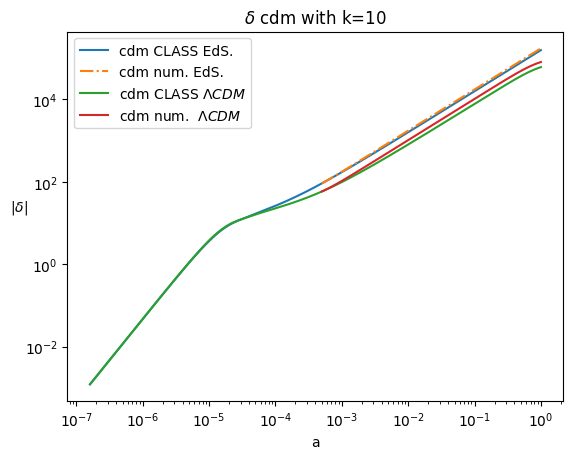

In [51]:
def f(k_ind=0):#,Omega_M=0.99):
    #Omega_M = 0.31
    Omega_M = 0.98
    Omega_b = 0.01
    Omega_lambda = 1 - Omega_b - Omega_M
    kvec = [0.01,0.1,1,10,1e-5]
    #k_ind = 0
    mv_test = .1
    k = kvec[k_ind]
    H0=68
    Tv_k = 1.947
    # in MeV
    h = 0.6704
    kb = 8.617e-11 # MeV/K
    T_0 = Tv_k * kb
    cosmo_dict ={'H0':H0, 'Omega_cdm':Omega_M,'Omega_b':Omega_b, 'k_output_values':str(kvec).strip('[]')
                 ,"N_ncdm":1,"m_ncdm":mv_test # massen er givet i eV s' jeg ganger min egen test m_v skal være en faktor  1e-6 mindre
               ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
                "ncdm_fluid_approximation":3
                , "YHe":0.25,
                 "gauge":"sync",
                }
    c = 3*1e5 # speed of lign in km/s
    H0 /= c # i 1/Mpc
    cosmo = Class()
    cosmo.set(cosmo_dict)
    cosmo.compute()
    bg = cosmo.get_background()
    pts = cosmo.get_perturbations()['scalar']
    # Here we create/import the powerspectrum values from class
    tranf = cosmo.get_transfer(z=0)
    prim = cosmo.get_primordial()
    pb = pts[k_ind]
    a = pb["a"]
    cdm = pb["delta_cdm"]
    neutrino = pb["delta_ncdm[0]"]
    plt.figure(k_ind)#np.random.randint(1,1000))
    plt.loglog(a,-cdm,label="cdm CLASS EdS.")#a,-neutrino)
    tau = pb["tau [Mpc]"]
    a_interp = scipy.interpolate.interp1d(tau,a)
    z = 2000
    a0 = 1/(z+1)
    delta_interp = scipy.interpolate.interp1d(a,pb["delta_cdm"])
    theta_interp = scipy.interpolate.interp1d(a,pb["theta_cdm"])
    a_interp = scipy.interpolate.interp1d(a,tau)
    tau_interp = scipy.interpolate.interp1d(tau,a)
    def H(a,om=Omega_M,ol=Omega_lambda):
        return H0 * np.sqrt(om / a + ol* a**2)
    def cdm_func(a,y):
        delta = y[0]
        theta = y[1]   
        d_delta   = - theta / (a * H(a))
        nabla2phi = (3/2) * H0*H0 * Omega_M * delta / a
        d_theta   = ( - nabla2phi -  H(a) * theta ) / (a*H(a))
        return [d_delta,d_theta]
    h = 1.1 
    y01 = [delta_interp(a0),5e-3]#theta_interp(a0)]
    
    
    
    
    def func(a,y):
        delta = y[0]
        d_delta = y[1]
        d2_delta = 3/2 * Omega_M * delta /(a**3 * (Omega_M/a + a**2 * Omega_lambda))-  3/2 * (Omega_M/a**2 +2 * a *Omega_lambda)/(Omega_M/a + a**2 * Omega_lambda )*d_delta    
        return [d_delta,d2_delta]
    h = 0.00001
    #diff = (delta_interp(a0+h)-delta_interp(a0))/h
    
    diff = (delta_interp(a0+h/2)-delta_interp(a0-h/2))/h
    y0 = [delta_interp(a0), diff]
    
    
    
    a_span = [a0,1]
    sol = sc.solve_ivp(func, t_span = a_span, y0 = y0,t_eval=np.logspace(np.log10(a0),0,100))
    t_sol = sol.t
    delta_sol = sol.y[0]
    plt.loglog(t_sol,-delta_sol,"-.",label="cdm num. EdS.")
     
    plt.ylabel("$|\delta|$",rotation=0)
    #plt.xlim([2e-8,1])
    print(a0)
    plt.legend()
    plt.title("$\delta$ cdm with k=%s"%kvec[k_ind])
    plt.xlabel("a")
    plt.savefig("2-cdm-versus-class with k=%s Ed.png"% kvec[k_ind])
    
    cosmo.struct_cleanup()
   
     ####################################################
    ####################################################
    ####################################################
    Omega_M = 0.31
    Omega_b = 0.01
    H0 *= c
    Omega_lambda = 1 - Omega_b - Omega_M
    cosmo_dict ={"gauge":"sync",'H0':H0, 'Omega_cdm':Omega_M,'Omega_b':Omega_b, 'k_output_values':str(kvec).strip('[]')
                 ,"N_ncdm":1,"m_ncdm":mv_test # massen er givet i eV s' jeg ganger min egen test m_v skal være en faktor  1e-6 mindre
               ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
                "ncdm_fluid_approximation":3
                , "YHe":0.25
                }
    c = 3*1e5 # speed of lign in km/s
    H0 /= c # i 1/Mpc
    cosmo = Class()
    cosmo.set(cosmo_dict)
    cosmo.compute()
    bg = cosmo.get_background()
    pts = cosmo.get_perturbations()['scalar']
    # Here we create/import the powerspectrum values from class
    tranf = cosmo.get_transfer(z=0)
    prim = cosmo.get_primordial()
    pb = pts[k_ind]
    a = pb["a"]
    cdm = pb["delta_cdm"]
    neutrino = pb["delta_ncdm[0]"]
    plt.figure(k_ind)#np.random.randint(1,1000))
    plt.loglog(a,-cdm,label="cdm CLASS $\Lambda CDM$")#a,-neutrino)
    tau = pb["tau [Mpc]"]
    a_interp = scipy.interpolate.interp1d(tau,a)
    z = 2000
    a0 = 1/(z+1)
    delta_interp = scipy.interpolate.interp1d(a,pb["delta_cdm"])
    theta_interp = scipy.interpolate.interp1d(a,pb["theta_cdm"])
    a_interp = scipy.interpolate.interp1d(a,tau)
    tau_interp = scipy.interpolate.interp1d(tau,a)
    def H(a,om=Omega_M,ol=Omega_lambda):
        return H0 * np.sqrt(om / a + ol* a**2)

    def cdm_func(a,y):
        delta = y[0]
        theta = y[1]   
        d_delta   = - theta / (a * H(a))
        nabla2phi = (3/2) * H0*H0 * Omega_M * delta / a
        d_theta   = ( - nabla2phi -  H(a) * theta ) / (a*H(a))
        return [d_delta,d_theta]
    
    
    def func(a,y):
        delta = y[0]
        d_delta = y[1]
        d2_delta = 3/2 * Omega_M * delta /(a**3 * (Omega_M/a + a**2 * Omega_lambda))-  3/2 * (Omega_M/a**2 +2 * a *Omega_lambda)/(Omega_M/a + a**2 * Omega_lambda )*d_delta    
        return [d_delta,d2_delta]
    h = 0.00001
    diff = (delta_interp(a0+h/2)-delta_interp(a0-h/2))/h
    y0 = [delta_interp(a0), diff]
    
    y01 = [delta_interp(a0),theta_interp(a0)]
    a_span = [a0,1]
    sol = sc.solve_ivp(cdm_func, t_span = a_span, y0 = y01)
    sol1 = sc.solve_ivp(func, t_span = a_span, y0 = y0,t_eval=np.logspace(np.log10(a0),0,100))
    t_sol = sol.t
    delta_sol = sol.y[0]
    print(len(sol1.t))
    #plt.loglog(t_sol,-delta_sol,"-.",label="cdm num.  $\Lambda CDM$")
    plt.loglog(sol1.t,-sol1.y[0],label="cdm num.  $\Lambda CDM$")#,label="cdm num af anden grad. lign.")
    plt.ylabel("$|\delta|$",rotation=0)
    #plt.xlim([2e-6,1])
    #plt.ylim([1e-3,5e4])
    print(a0)
    plt.legend()
    plt.title("$\delta$ cdm with k=%s"%kvec[k_ind])
    plt.xlabel("a")
    #plt.yscale("linear")
    #plt.ylim([10,1e5])
    plt.savefig("2-cdm-versus-class with k=%s Ed.png"% kvec[k_ind])
    
    cosmo.struct_cleanup()
    
    return None

#f(0)
#f(1)
#f(2)
f(3)
#f(4)

# Alt herefter er ikke relevant


Text(0.5, 1.0, 'neutrino power sepctrum for a neutrino of mass 0.1 eV')

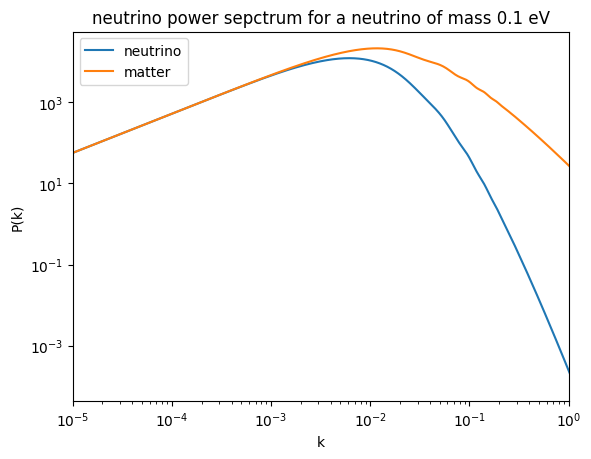

In [31]:
Omega_M = 0.3
Omega_R = 7e-5
Omega_lambda = 1 - Omega_M - Omega_R
Tv_k = 1.947
# in MeV
kb = 8.617e-11 # MeV/K
T0 = Tv_k * kb
H0 = 67 / (3*1e5) # i 1/Mpc
mv_test = 1e-1 # eV
kvec = np.logspace(-3,1,30)
h = 0.6704
cosmo_dict ={'h':h,  'Omega_cdm':Omega_M, 'k_output_values':str(kvec).strip('[]'), "N_ncdm":1,
             "m_ncdm":mv_test # massen er givet i eV s' jeg min egen test m_v skal være en faktor  1e-6 mindre
           ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
            "ncdm_fluid_approximation":3
            }
cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
bg = cosmo.get_background()
pts = cosmo.get_perturbations()['scalar']
#print(bg.keys())
z = bg["z"]
a = 1/(z+1)
aend = a[-1]
a0 = a[0]
mv = mv_test * 1e-6
tranf = cosmo.get_transfer(z=0)
#print(tranf.keys())
prim = cosmo.get_primordial()
#print(prim.keys())

k = tranf['k (h/Mpc)'] * h
#plt.loglog(tranf['k (h/Mpc)'],-tranf["d_ncdm[0]"])

prim_interp = scipy.interpolate.interp1d(prim["k [1/Mpc]"],prim["P_scalar(k)"], fill_value="extrapolate",kind="cubic")
plt.figure(1)

plt.loglog(k, 2*np.pi**2 * tranf["d_ncdm[0]"]**2* k**(-3) * prim_interp(k) * h**3,label="neutrino")
plt.loglog(k, 2*np.pi**2 * tranf["d_m"]** 2 *k**(-3) *  prim_interp(k) * h**3,label="matter")
plt.xlim([1e-5,1])
plt.legend()
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("neutrino power sepctrum for a neutrino of mass %s eV" % mv_test)
#plt.ylim([1e-3,1e1])
#plt.show()

In [93]:

def simuler(mv_test, # eV
            kvec,
           x1,k_ind1,
           x2,k_ind2
           ):
    Omega_M = 0.3
    Omega_R = 7e-5
    Omega_lambda = 1 - Omega_M - Omega_R
    Tv_k = 1.947
    # in MeV
    kb = 8.617e-11 # MeV/K
    T0 = Tv_k * kb
    H0 = 67 / (3*1e5) # i 1/Mpc

    cosmo_dict ={'H0':70,  'Omega_cdm':Omega_M, 'k_output_values':str(kvec).strip('[]'), "N_ncdm":1,
                 "m_ncdm":mv_test # massen er givet i eV s' jeg min egen test m_v skal være en faktor  1e-6 mindre
               ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
                "ncdm_fluid_approximation":3
                }

    cosmo = Class()
    cosmo.set(cosmo_dict)
    cosmo.compute()
    bg = cosmo.get_background()

    pts = cosmo.get_perturbations()['scalar']
    #print(bg.keys())
    z = bg["z"]
    a = 1/(z+1)
    aend = a[-1]
    a0 = a[0]

    mv = mv_test * 1e-6

    k1 = kvec[k_ind1]
    T_ini1 = x1 / k1

    k2 = kvec[k_ind2]
    T_ini2 = x2 / k2

    # cs front faktoren
    factor = 2.68


    # udregner Hubbleparameteren

    def H(a):
        return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) 

    # udregnger tau 

    def tau_cal(a,y):
        # Vores "tids"-værdi i denne differentialligning er a
        tau = y[0]
        d_tau = 1 / (a ** 2 * H(a))
        return np.array(d_tau)

    # temperatur

    def Tv(a):
        return T0 / a # in MeV

    # lydhastighed

    def cs(a,mv,factor):
        return factor * Tv(a) / mv

    # udregn a
    def a_solve(τ,y):
        a = y[0]
        a_dt = a * a * H(a)
        return [a_dt]

    tau_init =   (1/H0) * (Omega_R ** (-0.5)) * a0


    sol_tau = sc.solve_ivp(tau_cal,t_span=[a0,aend],y0=[tau_init])
    tau = sol_tau.y[0]

    sol_a = sc.solve_ivp(a_solve,t_span=[tau[0],tau[-1]],y0=[a0])
    a_tau = sol_a.t
    a = sol_a.y[0]

    a_interp = scipy.interpolate.interp1d(a_tau,a)

    # sammenlignings data fra Class

    
    if k1 == k2 :
        # 1
        delta_class1 = delta_class2 =  pts[k_ind1]["delta_cdm"]
        theta_class1 = theta_class2 = pts[k_ind1]["theta_cdm"]
        tau_class1 = tau_class2 = pts[k_ind1]["tau [Mpc]"]
        delta_neutrino_class1 = delta_neutrino_class2 = pts[k_ind1]["delta_ncdm[0]"]
        theta_neutrino_class1 = theta_neutrino_class2 = pts[k_ind1]["theta_ncdm[0]"]
        a_class1 = a_class2 = pts[k_ind1]["a"]
    else:
        # 1
        delta_class1 = pts[k_ind1]["delta_cdm"]
        theta_class1 = pts[k_ind1]["theta_cdm"]
        tau_class1 = pts[k_ind1]["tau [Mpc]"]
        delta_neutrino_class1 = pts[k_ind1]["delta_ncdm[0]"]
        theta_neutrino_class1 = pts[k_ind1]["theta_ncdm[0]"]
        a_class1 = pts[k_ind1]["a"]
        # 2
        delta_class2 = pts[k_ind2]["delta_cdm"]
        theta_class2 = pts[k_ind2]["theta_cdm"]
        tau_class2 = pts[k_ind2]["tau [Mpc]"]
        delta_neutrino_class2 = pts[k_ind2]["delta_ncdm[0]"]
        theta_neutrino_class2 = pts[k_ind2]["theta_ncdm[0]"]
        a_class2 = pts[k_ind2]["a"]
    if T_ini1 == T_ini2 and k_ind1 == k_ind2:

        # 1
        delta_init1 = delta_init2=scipy.interpolate.interp1d(tau_class1,delta_class1)(T_ini1)
        theta_init1 =theta_init2= scipy.interpolate.interp1d(tau_class1,theta_class1)(T_ini1)
        delta_neutrino_init1=delta_neutrino_init2 = scipy.interpolate.interp1d(tau_class1,delta_neutrino_class1)(T_ini1)
        theta_neutrino_init1=theta_neutrino_init2 = scipy.interpolate.interp1d(tau_class1,theta_neutrino_class1)(T_ini1)
        t_span1=t_span2 = [T_ini1,tau[-1]]
    else:
        delta_init1 = scipy.interpolate.interp1d(tau_class1,delta_class1)(T_ini1)
        theta_init1 = scipy.interpolate.interp1d(tau_class1,theta_class1)(T_ini1)
        delta_neutrino_init1 = scipy.interpolate.interp1d(tau_class1,delta_neutrino_class1)(T_ini1)
        theta_neutrino_init1 = scipy.interpolate.interp1d(tau_class1,theta_neutrino_class1)(T_ini1)
        t_span1 = [T_ini1,tau[-1]]
        # 2
        delta_init2 = scipy.interpolate.interp1d(tau_class2,delta_class2)(T_ini2)
        theta_init2 = scipy.interpolate.interp1d(tau_class2,theta_class2)(T_ini2)
        delta_neutrino_init2 = scipy.interpolate.interp1d(tau_class2,delta_neutrino_class2)(T_ini2)
        theta_neutrino_init2 = scipy.interpolate.interp1d(tau_class2,theta_neutrino_class2)(T_ini2)
        t_span2 = [T_ini2,tau[-1]]
        

    def cdm_func(τ,y):
        delta = y[0]
        theta = y[1]    
        a = a_interp(τ)
        d_delta   = - theta
        nabla2phi = (3/2) * H0*H0 * Omega_M * delta / a
        d_theta   =  - nabla2phi -  H(a) * theta * a
        return [d_delta,d_theta]

    y01 = [delta_init1,theta_init1]
    y02 = [delta_init2,theta_init2]

    sol_cdm1 = sc.solve_ivp(cdm_func, t_span = t_span1, y0 = y01)
    sol_cdm2 = sc.solve_ivp(cdm_func, t_span = t_span2, y0 = y02)

    t_cdm1 = sol_cdm1.t
    t_cdm2 = sol_cdm2.t
    delta_cdm1 = sol_cdm1.y[0]
    delta_cdm2 = sol_cdm2.y[0]


    delta_cdm_interp1 = scipy.interpolate.interp1d(t_cdm1,delta_cdm1)
    delta_cdm_interp2 = scipy.interpolate.interp1d(t_cdm2,delta_cdm2)

    def neu_func(τ,y,k,mv,factor,version):
        delta = y[0]
        theta = y[1]    
        a = a_interp(τ)
        d_delta   = - theta
        if version == 1:
            delta_cdm = delta_cdm_interp1(τ)
        else:
            delta_cdm = delta_cdm_interp2(τ)
        d_theta   =  -  H(a) * a * theta - (3/2) * H0*H0 * Omega_M * delta_cdm / a  + k**2 * cs(a,mv,factor)**2 * delta 
        return [d_delta,d_theta]


    y01_neutrino = [delta_neutrino_init1,theta_neutrino_init1]
    y02_neutrino = [delta_neutrino_init2,theta_neutrino_init2]

    sol_neu1 = sc.solve_ivp(neu_func, t_span = t_span1, y0 = y01_neutrino,args=(k1,mv,factor,1))
    sol_neu2 = sc.solve_ivp(neu_func, t_span = t_span2, y0 = y02_neutrino,args=(k2,mv,factor,2))

    # Det vi plotter neutrinoerne med
    t_nue1 = sol_neu1.t
    t_nue2 = sol_neu2.t
    delta_neu1 = sol_neu1.y[0]
    delta_neu2 = sol_neu2.y[0]


    fig, (ax1, ax2) = plt.subplots(1, 2)
    # Figur 1
    ax1.loglog(t_cdm1,-delta_cdm1,label="min cdm")
    ax1.loglog(t_nue1,-delta_neu1,label="min nu")
    ax1.loglog(tau_class1,-delta_class1,label="class cdm")
    ax1.loglog(tau_class1,-delta_neutrino_class1,label="class nu")
    ax1.axvline(T_ini1)
    ax1.set_xlabel("tau")
    ax1.set_title("k=%s X=%s mv=%.4s eV" %(k1,x1,mv*1e6))
    ax1.legend()
    # Figur 2
    ax2.loglog(t_cdm2,-delta_cdm2,label="min cdm")
    ax2.loglog(t_nue2,-delta_neu2,label="min nu")
    ax2.loglog(tau_class2,-delta_class2,label="class cdm")
    ax2.loglog(tau_class2,-delta_neutrino_class2,label="class nu")
    ax2.axvline(T_ini2)
    ax2.set_xlabel("tau")
    ax2.set_title("k=%s X=%s mv=%.4s eV" %(k2,x2,mv*1e6))
    ax2.legend()
    return None
